In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

Discutiremos aquí los aspectos básicos de la implementación del método de mínimos cuadrados ponderados en Python.

Cargamos primero los datos de x e y, así como del error de en las medidad de y

In [2]:
d = genfromtxt('ej-ajuste-04.txt')
x = d[:,0]
y = d[:,1]
ey = d[:,2]
print(x)
print(y)
print(ey)

[ 1.  2.  3.  4.  5.  6.]
[ 2.8  3.3  3.5  3.5  4.8  4.2]
[ 0.3  0.3  0.5  1.   0.3  1. ]


Graficamos los datos usando la función `errorbar` de Matplotlib:

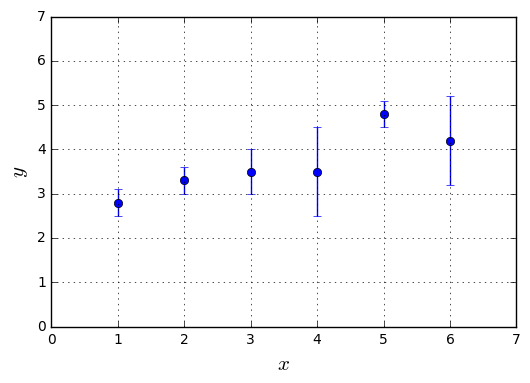

In [3]:
errorbar(x,y,ey,fmt='o')
xlim(0,7)
ylim(0,7)
xlabel('$x$', fontsize=15)
ylabel('$y$', fontsize=15)
grid()

Podemos usar `polyfit` de Numpy para ajustar una recta, usando mínimos cuadrados ponderados. Para esto, incluyendo el error con la opción `w = 1/`$\sigma_y$ que especifica los pesos correctos para la minimización de la función
$$
\chi^2 = \sum_{i=1}^N\frac{(y_i-f(x_i))^2}{\sigma_y^2}.
$$
Aquí ajustaremos el modelo lineal dado por
$$
f(x) = a0+a1\cdot x
$$

In [4]:
c = polyfit(x,y,1,w=1./ey)
print('a0 = '+str(c[1]))
print('a1 = '+str(c[0]))

a0 = 2.34204247555
a1 = 0.457131226109


Graficamos el ajuste y lo comparamos con el ajuste sin tomar en cuenta la ponderación:

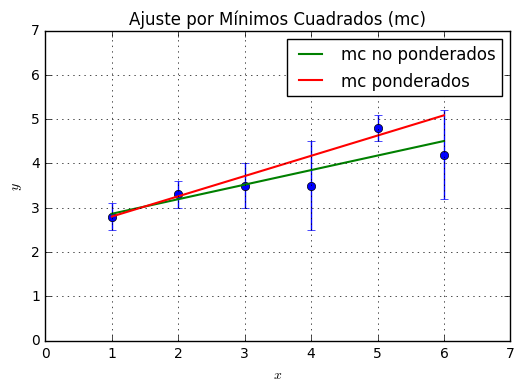

In [5]:
errorbar(x,y,ey,fmt='o')
xx = linspace(min(x),max(x),100)
plot(xx,polyval(polyfit(x,y,1),xx), label='mc no ponderados',lw=1.5)
plot(xx,polyval(c,xx), label='mc ponderados',lw=1.5)
xlim(0,7)
ylim(0,7)
grid()
legend(loc = 'best')
title(u'Ajuste por Mínimos Cuadrados (mc)')
xlabel(r'$x$')
ylabel(r'$y$')
#savefig('fig-mc-ponderado.pdf')

Similarmente, podemos usar la función `curve_fit` de scipy.optimize

In [6]:
from scipy.optimize import curve_fit

def f(x,a0,a1):
    return a0+a1*x

In [7]:
(a0,a1) = curve_fit(f,x,y,sigma=ey)[0]

print('a0 = '+str(a0))
print('a1 = '+str(a1))

a0 = 2.3420424734
a1 = 0.457131228233


Finalmente, también podemos usar la función `leastsq`:

In [8]:
from scipy.optimize import leastsq

def epn(a,x,y,ey):
    return (a[0]+a[1]*x-y)/ey

In [9]:
a_in=[1,1]
a2 = leastsq(epn,a_in,args=(x,y,ey))[0]
print('a0 = '+str(a2[0]))
print('a1 = '+str(a2[1]))

a0 = 2.3420424734
a1 = 0.457131228233


Podemos además graficar la función $\chi^2$ para distintos valores de los parámetros $a_0$ y $a_1$ en torno al los valores óptimos, para verificar que minimizan $\chi^2$:

In [10]:
def chi2(a,b):
    return sum((epn(array([a,b]),x,y,ey))**2)

chi2v=vectorize(chi2)
aa,bb=meshgrid(linspace(-2,7,100),linspace(-2,2,100))

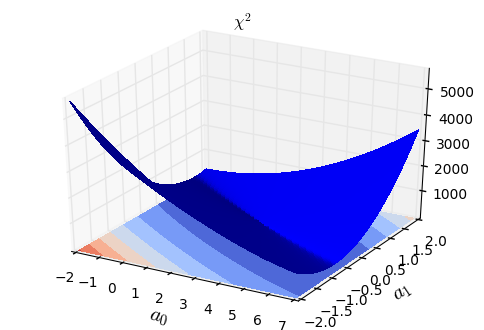

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig=figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(aa,bb,chi2v(aa,bb), rstride=1, cstride=1, linewidth=0, antialiased=False)
ax.contourf(aa,bb,chi2v(aa,bb), zdir='z', offset=-100, cmap=cm.coolwarm)
xlabel('$a_0$', fontsize=15)
ylabel('$a_1$', fontsize=15)
title('$\chi^2$')

Como vemos, en ocasiones en este tipo de gráfico no se aprecia tan claramente el mínimo. Una forma alternativa es dibujar las curvas de contorno de $\chi^2$, es decir, las curvas en el plano $a_0--a_1$ de igual valor de $\chi^2$. Esto puede realizarse usando la función `contour` de Matplotlib

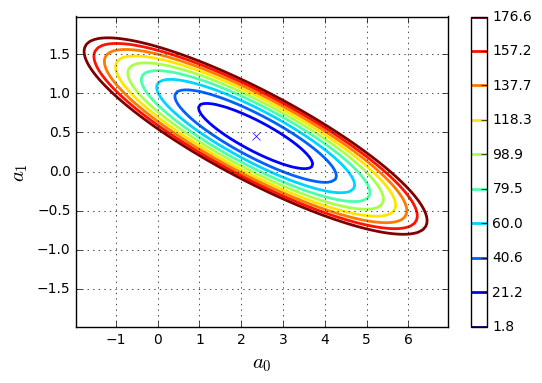

In [12]:
plot(a0,a1,'x')
levels=linspace(chi2v(a0,a1),100*chi2v(a0,a1),10)
contour(chi2v(aa,bb), levels,origin='lower', linewidths=2,extent=[-2,7,-2,2])
xlabel('$a_0$', fontsize=15)
ylabel('$a_1$', fontsize=15)
grid()
colorbar()